# Could Jack and Rose both survive in Titanic? 🤔

## Let the probability speak:

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import emoji

## Import the Titanic Dataset:  

In [58]:
titanic_df = pd.read_csv('train.csv')

titanic_df.head()
#titanic_df.shape (891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
#replace Nan values (Age)

titanic_df.Age.fillna(titanic_df.Age.mean(), inplace=True)

In [60]:
#convert categoric variable Sex into a binary array 0/1

titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [61]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

#feature set

X= titanic_df[['Pclass', 'Sex', 'Age']]
y= titanic_df['Survived']

#Instanciate the model

model= LogisticRegression(max_iter=1000)

# 5-Fold-Cross Validate model

cv_results= cross_validate(model, X, y, cv=5)

#Mean of accurancies

accuracy= cv_results['test_score'].mean()

accuracy

0.7878789780930261

## The model's accuracy is almost 80%! Good

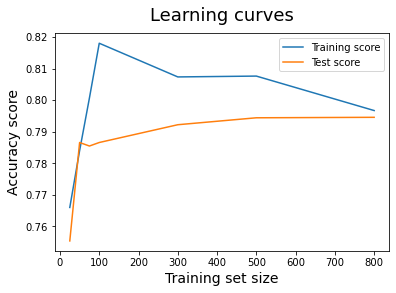

In [62]:
from sklearn.model_selection import learning_curve

#Get train scores, train sizes and vaidation scores using 'learning curve', r2 score

train_sizes, train_scores, test_scores= learning_curve(estimator= LogisticRegression(max_iter=1000),
                                                      X=X,
                                                      y=y,
                                                      train_sizes= [25,50,75,100,300,500,800],
                                                      cv=20)

#Take the mean of cross-validated train scores and validation scores

train_scores_mean= np.mean(train_scores, axis=1)
test_scores_mean= np.mean(test_scores, axis= 1)

#Plot the learning curves

plt.plot(train_sizes, train_scores_mean, label= 'Training score')
plt.plot(train_sizes, test_scores_mean, label= 'Test score')
plt.ylabel('Accuracy score', fontsize= 14)
plt.xlabel('Training set size', fontsize= 14)
plt.title('Learning curves', fontsize= 18, y= 1.03)
plt.legend()

## Since our model needs just 500 rows to learn, we will reduce the Training set size:

In [65]:
# Create the reduced feature set and target

df_reduced = titanic_df.sample(n=500, replace= True)
X_reduced = df_reduced[['Pclass', 'Sex', 'Age']]
y_reduced = df_reduced['Survived']

# 5-Fold Cross validate model
cv_results = cross_validate(LogisticRegression(max_iter=1000), X_reduced, y_reduced, cv=5)

# Mean of accuracies
reduced_training_accuracy = cv_results['test_score'].mean()

reduced_training_accuracy  

0.7899999999999999

 ## Prediction: Did Jack survive the Titanic disaster?  🔮

In [66]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Instanciate the model
log_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_model.fit(X_reduced, y_reduced)

# Use the trained model to predict
prediction = log_model.predict([[3,0,20.0]])[0]

prediction

0

### We got back 0, very likely he didn't survive. ❌

## Exact Jack's survival probability:

In [124]:
# Access probability of class 1 in model attributes

probability = log_model.predict_proba([[3,0,20.0]])[0][1]

probability #0.11765876887594727

0.11765876887594727

## Prediction: Did Rose survive the Titanic disaster? 🔮

In [69]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Instanciate the model
log_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_model.fit(X_reduced, y_reduced)

# Use the trained model to predict
prediction = log_model.predict([[1,1,17.0]])[0]

prediction

1

###  We got back 1, very likely She survived! ✔️

### Exact JRose's survival probability:

In [125]:
# Access probability of class 1 in model attributes

probability = log_model.predict_proba([[1,1,17.0]])[0][1]

probability #0.9478791786908144

0.9478791786908144

## Let's plot the % Chances of survival:

In [128]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['% Not Survived', '% Survived']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=[88, 12], name="Chances Jack to survive", marker_colors=['#EF553B', '#636EFA']),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=[5, 95], name="Chances Jane to survive"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="% CHANCES OF SURVIVAL:",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='JACK', x=0.188, y=0.5, font_size=22, showarrow=False),
                 dict(text='ROSE', x=0.815, y=0.5, font_size=22, showarrow=False)],
    font=dict(
        family="Nunito, monospace",
        size=18,
        color="Black"
    ))
    
fig.show()